# Artificial Neural Network
Implementing artificial neural network algorithm with back propogation

In [1]:
import numpy as np
np.set_printoptions(threshold=10)
import matplotlib.pyplot as plt

### Data

In [2]:
# This formula shall be imitated by the neural network
def formula_1(x):
    return x + 0.75

# This formula shall be imitated by the neural network, too
def formula_2(x):
    return(np.sin(x) + 0.5)

In [3]:
# Input data
X = np.random.uniform(low=-0.5, high=1.55, size=100)# make 100 uniformly distributed samples
X = X.reshape(-1, 1) # -1 indicates "as many rows as required"
X # input data as column vector

array([[ 0.17685987],
       [ 0.43046608],
       [ 1.09999859],
       ...,
       [ 0.65548095],
       [-0.4297257 ],
       [-0.37245706]])

In [4]:
# Target values with formula_1
y_1 = np.array([formula_1(x) for x in X.flatten()]) # one output per sample, |X|-many samples
y_1 = y_1.reshape(-1, 1)
y_1 # target data as column vector

array([[0.92685987],
       [1.18046608],
       [1.84999859],
       ...,
       [1.40548095],
       [0.3202743 ],
       [0.37754294]])

In [5]:
# Target values with formula_2
y_2 = np.array([formula_2(x) for x in X.flatten()]) # one output per sample, |X|-many samples
y_2 = y_2.reshape(-1, 1)
y_2 # target data as column vector

array([[0.6759393 ],
       [0.91729441],
       [1.39120672],
       ...,
       [1.10954059],
       [0.08337854],
       [0.13609488]])

### Implementation of the ANN Algorithm

Imitation of formula 'x+0.75'
Weight_1:1.8046094197135045
Weight_2:3.753472532252808
Bias:0.9532580554010317


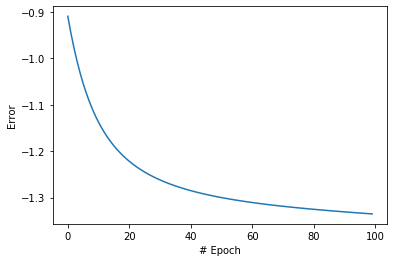

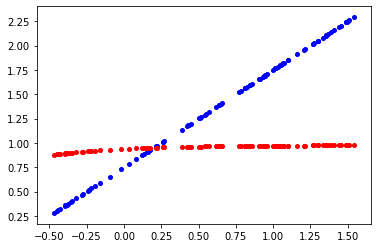


Imitation of formula 'sin(x)+0.5'
Weight_1:1.866391268499486
Weight_2:2.6503479056755466
Bias:0.34834904242762676


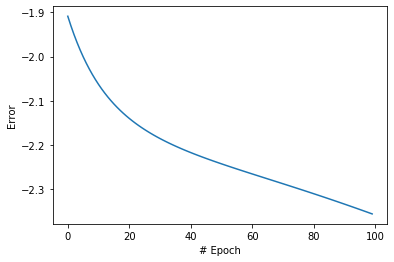

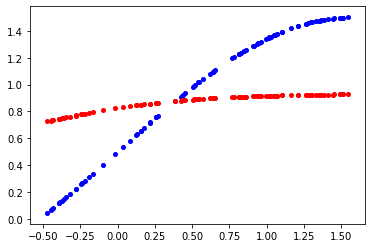

In [6]:

# Simple neural-network based regressor
class NeuralNetwork:
    
    # Function called at object initialization
    def __init__(self):
        
        # These are members of the class. We can access them in every method by "self.var_name" 
        #and from outside the class with "instance_name.var_name"
        
        # Sample to compute pass with
        self.X          = 1.0 # set me!
        self.y          = 0.0 # set me!
        
        # Parameters to be learned
        self.weight_1   = 1.0 # teach me!
        self.weight_2   = 1.0 # teach me!
        self.bias       = 1.0 # teach me!
        
        # State information
        self.hidden     = 0.0 # use me!
        self.output     = 0.0 # use me!
        self.error      = 0.0 # use me!
        
    # Set sample to be used in feed-forward and back-propagation pass
    def set_sample(self, X, y):
        self.X = float(X)
        self.y = float(y)
        
    # Feed-forward pass
    def feed_forward(self):
        # Feed-forward pass and error estimation
        
        net_hidden = (self.X * self.weight_1) + self.bias
        self.hidden = sigmoid(net_hidden) #sigmoid function // output of Hidden layer 1
        
        net_output = self.hidden * self.weight_2 
        self.output = sigmoid(net_output) #sigmoid function // Predicted Output
        
        self.error = 0.5 * ((self.y - self.output)**2) # Error calculation using loss function
        
    # Back-propagation pass
    def back_prop(self):
        # updating weight 2 (applied chian rule)
        dError_dw2 =(self.output-self.y) * (self.output) * (1-self.output) * self.hidden
        w2_new=(self.weight_2) - (0.01 * dError_dw2)
        self.weight_2 = w2_new
        
        # updating weight 1 (applied chian rule)
        dError_dw1 =(self.output-self.y)*(self.output)*(1-self.output)*(self.weight_2)*((self.hidden)*(1-self.hidden))*(self.X)
        w1_new=(self.weight_1) - (0.01 * dError_dw1)
        self.weight_1 = w1_new
        
        # updating bias (applied chian rule)
        dError_dbias =(self.output-self.y)*(self.output)*(1-self.output)*(self.weight_2)*((self.hidden)*(1-self.hidden))
        bias_new = self.bias - (0.01 * dError_dbias)
        self.bias = bias_new
        
# Sigmoid Function
def sigmoid(s):
    return (1/(1+np.exp(-s)))
    
def execute_nn(X, y):
    nn = NeuralNetwork() # Instantiate neural network
    
    epoch_error = [] # Collect mean error of each epoch to plot it later
    
    for epoch in range(0,100):
        # stochastic gradient descent and train neural network.
        
        error_sum=0 # For taking mean of error of each epoch
        
        for i in np.random.permutation(100): # shuffling the dataset
            nn.set_sample(X[i], y[i]) # setting samples i.e. input and target values
            nn.feed_forward() # perform feed-forward to calculate output
            nn.back_prop() # use difference between target and actual output to update parameters
            error_sum += nn.error
        epoch_error.append(error_sum / len(X)) # storing the mean of error for each epoch
    
    # Print final parameters of trained neural network
    print("Weight_1:"+ str(nn.weight_1))
    print("Weight_2:" + str(nn.weight_2))
    print("Bias:" + str(nn.bias))
    
    # Plot epoch errors with logarithmic transformation
    plt.plot(list(range(len(epoch_error))), np.log(epoch_error))
    ax = plt.gca()
    ax.set_xlabel('# Epoch')
    ax.set_ylabel('Error')
    plt.show()
    
    # Plot datapoints as originally transformed and as transformed by neural network
    computed = []
    for i in range(0, X.shape[0]):
        nn.set_sample(X[i], y[i])
        nn.feed_forward()
        nn.back_prop()
        computed.append(nn.output)
#         print('w1 ',nn.weight_1,'w2 ',nn.weight_2,'b ',nn.bias)
    plt.scatter(X.transpose().flatten(), y.transpose().flatten(), c='blue', s=16)
    plt.scatter(X.transpose().flatten(), computed, c='red', s=16)
    plt.show()
    

print("Imitation of formula 'x+0.75'")
execute_nn(X,y_1)
print()
print("Imitation of formula 'sin(x)+0.5'")
execute_nn(X,y_2)